c:\Users\WD\anaconda3\envs\ml_env\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 9 is too high: all coefficients will experience boundary effects.
  warnings.warn(


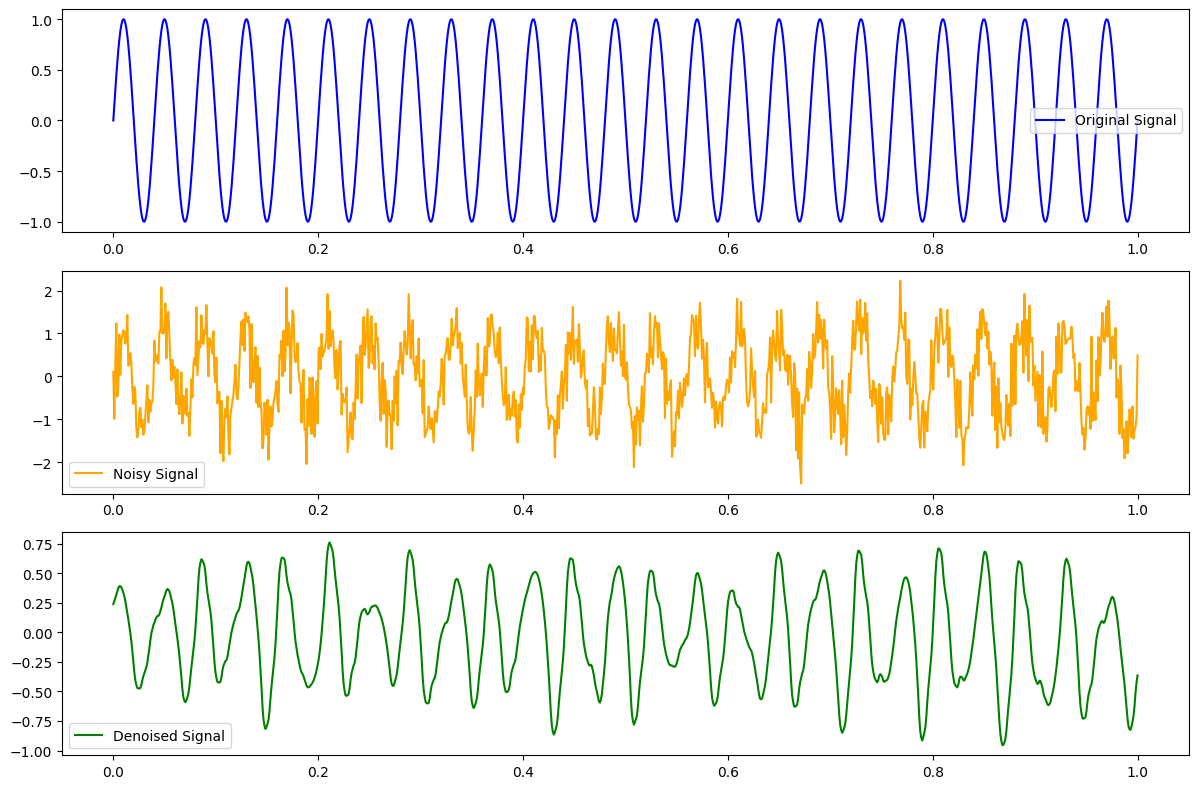

In [4]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a noisy signal (sinusoidal wave + Gaussian noise)
x = np.linspace(0, 1, 1024)
signal = np.sin(50 * np.pi * x)  # Original clean signal
noise = 0.5 * np.random.randn(len(x))  # Add noise
noisy_signal = signal + noise

# Wavelet denoising
wavelet = 'db4'  # Daubechies wavelet
max_level = 9   # Maximum level of decomposition

# Perform wavelet decomposition
coeffs = pywt.wavedec(noisy_signal, wavelet, level=max_level)

# Apply soft thresholding for denoising
threshold = np.sqrt(2 * np.log(len(noisy_signal))) * np.std(noise)
denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

# Reconstruct the denoised signal
denoised_signal = pywt.waverec(denoised_coeffs, wavelet)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot the original signal
plt.subplot(3, 1, 1)
plt.plot(x, signal, label="Original Signal", color='blue')
plt.legend()

# Plot the noisy signal
plt.subplot(3, 1, 2)
plt.plot(x, noisy_signal, label="Noisy Signal", color='orange')
plt.legend()

# Plot the denoised signal
plt.subplot(3, 1, 3)
plt.plot(x, denoised_signal, label="Denoised Signal", color='green')
plt.legend()

plt.tight_layout()
plt.show()


c:\Users\WD\anaconda3\envs\ml_env\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 9 is too high: all coefficients will experience boundary effects.
  warnings.warn(


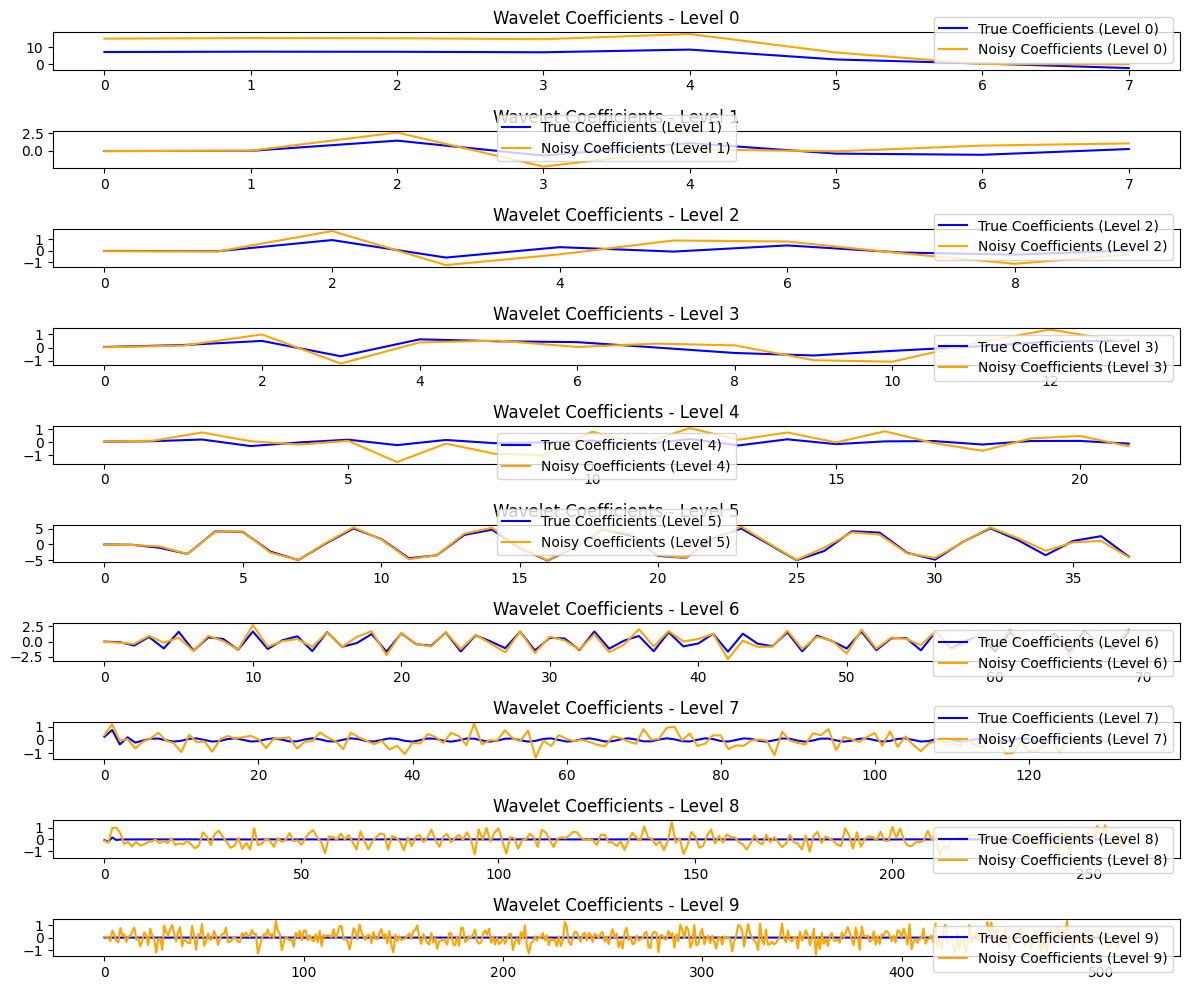

In [10]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Step 1: Generate the original clean signal (sinusoidal wave)
x = np.linspace(0, 1, 1024)  # Time vector
signal = np.sin(50 * np.pi * x)  # Clean sinusoidal signal

# Step 2: Add Gaussian noise to the signal
noise = 0.5 * np.random.randn(len(x))  # Generate noise
noisy_signal = signal + noise  # Combine signal with noise

# Step 3: Perform wavelet decomposition
wavelet = 'db4'  # Choose Daubechies wavelet
max_level = 9    # Choose decomposition level

# True coefficients (from the clean signal)
coeff_true = pywt.wavedec(signal, wavelet, level=max_level)

# Noisy coefficients (from the noisy signal)
coeffs = pywt.wavedec(noisy_signal, wavelet, level=max_level)

# Step 4: Plot true coefficients vs noisy coefficients
plt.figure(figsize=(12, 10))
for i in range(len(coeff_true)):
    plt.subplot(len(coeff_true), 1, i + 1)
    plt.plot(coeff_true[i], label=f"True Coefficients (Level {i})", color='blue')
    plt.plot(coeffs[i], label=f"Noisy Coefficients (Level {i})", color='orange')
    plt.legend()
    plt.title(f"Wavelet Coefficients - Level {i}")

plt.tight_layout()
plt.show()


In [7]:
coeff_true

[array([ 7.21867431,  7.42787163,  7.37302399,  7.07143471,  8.6397381 ,
         2.86670741,  0.5156501 , -2.16455493]),
 array([-0.02447382,  0.00149645,  1.45182606, -0.67816661,  1.09737185,
        -0.39108186, -0.55888417,  0.25777485]),
 array([-0.02696606, -0.04541143,  0.92085495, -0.60199017,  0.30349607,
        -0.08270747,  0.45569545, -0.16324561, -0.34960041,  0.02786331]),
 array([ 0.0522622 ,  0.19835796,  0.5097892 , -0.64676595,  0.62877393,
         0.48353024,  0.41660394,  0.01282179, -0.39933297, -0.58816369,
        -0.24001627,  0.07172141,  0.44996636,  0.5246176 ]),
 array([ 0.03976264,  0.07441773,  0.2046195 , -0.30237929, -0.02033938,
         0.19009854, -0.2306504 ,  0.16894801, -0.08026954, -0.02122564,
         0.11933171, -0.19838397,  0.24576008, -0.25389544,  0.22149107,
        -0.15372102,  0.06088329,  0.08430317, -0.18294755,  0.08994265,
         0.09496846, -0.11569868]),
 array([-0.02236898, -0.11465238, -1.08995364, -3.03973164,  4.12657237,

In [8]:
plt.scatter(np.array(coeff_true), np.array(coeffs))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.